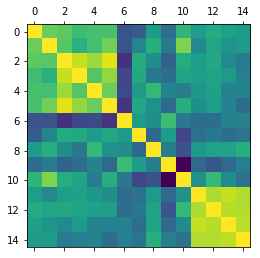

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("sample_agg_health_and_checkin_data.csv")

data.head()

# Tasks:
# - Attempt to explore and find the correlations between the metrics and the lifestyle
# measures using a correlation matrix.
# - Try different models in order to predict the metrics using the lifesyle measures,
# e.g. using regression. Try prediction for different prior rolling collections of data,
# such as the last week, or month of data, as well as the last day. Could use
# CNNs and teach the network to prioritise or 'give weight' to the last day or two
# of data, as this should be the most relevant for our purposes.
# - Explore and see if I can use a week's worth of data to predict how I'll be feeling for the next day.
# - Research the above point.

# Initial data exploration: identifying correltations between the data.
#
plt.matshow(data.corr())

In [9]:
# Which are the most correlated metrics?
def fetch_highest_correlated_paris(matrix):
    columns = matrix.columns
    
    for column in columns: 
        

SyntaxError: unexpected EOF while parsing (<ipython-input-9-02c75ede5f85>, line 6)

In [2]:
data.corr()["generalFeeling"]

activeEnergyBurned      0.226438
basalEnergyBurned       0.077865
caloricIntake           0.229425
dietaryCarbohydrates    0.254184
dietaryFats             0.186307
dietaryProtein          0.122473
hrv                    -0.122288
lowHeartRateEvents     -0.087935
restingHeartRate        0.202823
sleepHours             -0.147600
weight                  0.144793
generalFeeling          1.000000
mood                    0.788032
energy                  0.848435
focus                   0.794972
Name: generalFeeling, dtype: float64

In [4]:
# Plotting restingHeartRate against the 4 vitality indicators.
def compare_metrics(df, metricOne, metricTwo):
    feelingVHR = data[[metricOne, metricTwo]].dropna()
    plt.plot(feelingVHR[metricOne] / feelingVHR[metricOne].max())
    plt.plot(feelingVHR[metricTwo] / feelingVHR[metricTwo].max())
    plt.legend()

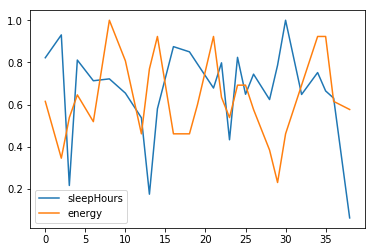

In [5]:
compare_metrics(data, "sleepHours", "energy")

In [6]:
vitality_metrics = ["generalFeeling", "mood", "focus", "energy"]
def get_most_correlated_complement(corr_matrix, metric):
    most_corr_metric, most_corr_val = ("", 0)
    for colName, value in corr_matrix[metric].iteritems():
        if (colName == metric or colName in vitality_metrics): 
            continue
        if (abs(value) > abs(most_corr_val)):
            most_corr_metric, most_corr_val = (colName, value)
    return (most_corr_metric, most_corr_val)

# # Fetch the most correlated metrics, and display a comparison for each.
def fetch_most_correlated_pairs(data):
    corr = data.corr()
    correlated_metrics = []
    for col in corr.columns:
        pair, corrVal = get_most_correlated_complement(corr, col)
        if ((col, pair, corrVal) not in correlated_metrics or (pair, col, corrVal) not in correlated_metrics):
            correlated_metrics.append((col, pair, corrVal))
    return correlated_metrics
        
def compare_most_correlated_visually(data):
    correlated_metrics = fetch_most_correlated_pairs(data)
    plotIndex = 0
    for (metricOne, metricTwo, _) in correlated_metrics:
        plt.figure(plotIndex)
        plotIndex += 1
        compare_metrics(data, metricOne, metricTwo)

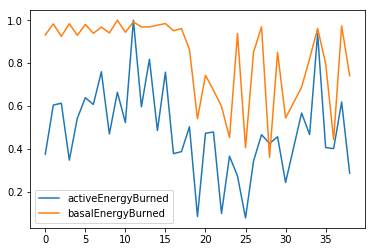

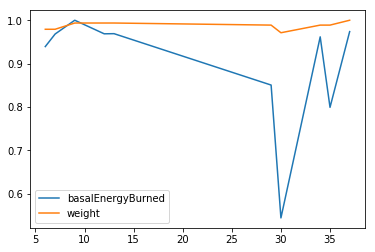

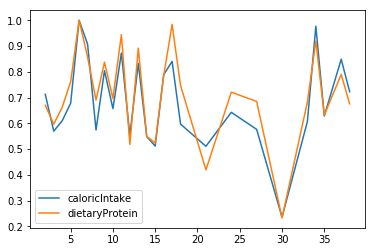

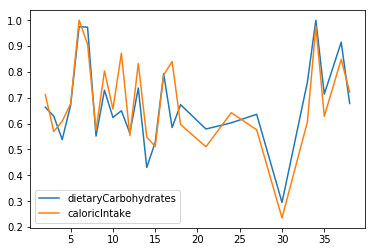

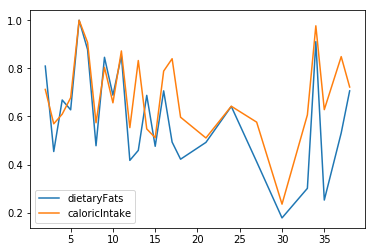

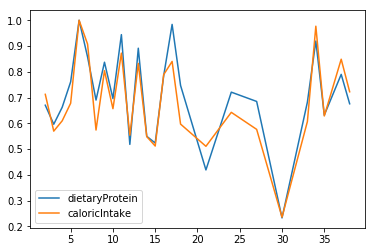

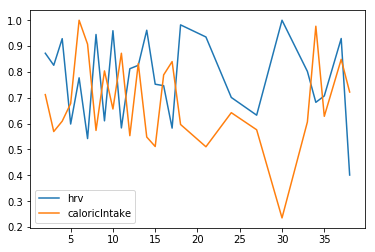

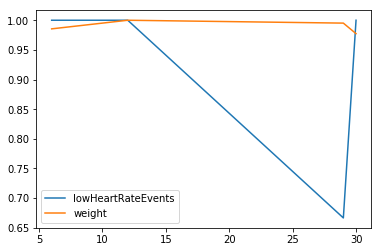

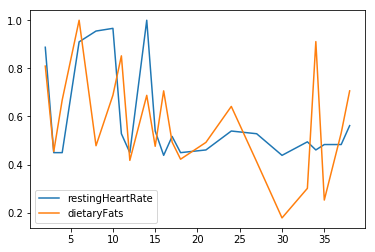

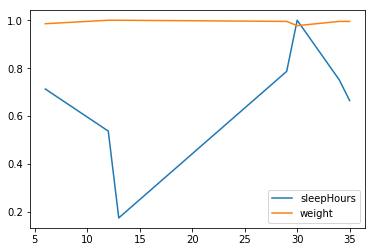

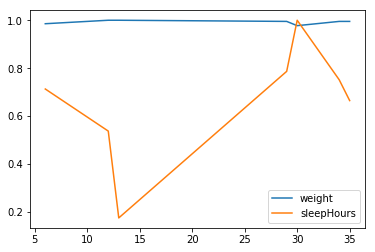

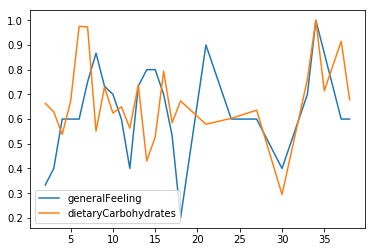

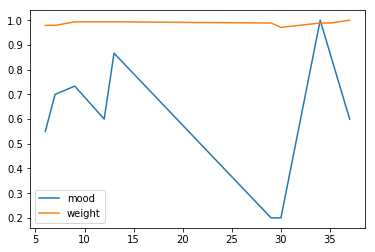

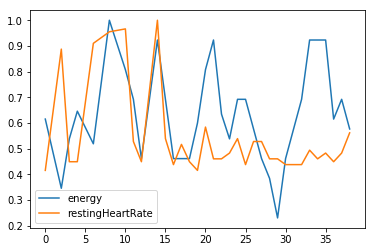

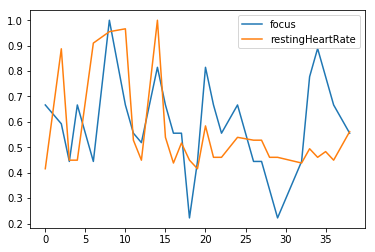

In [7]:
get_most_correlated_complement(data.corr(), "lowHeartRateEvents")
fetch_most_correlated_pairs(data)
compare_most_correlated_visually(data)

In [8]:
# Analysis: It looks like restingHeartRate is correlated with the vitality markers.
# Resting heart rate is also closely linked to fats. 
# Perhaps increasing my fat intake will help?

# Applying some Regressions with Scikit & Keras

In [34]:
import tensorflow as tf
from tensorflow import keras

import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
# Split dataset into input and output variables.
x = np.array(data.fillna(0)[vitality_metrics])
y = np.array(data.fillna(0, inplace=False)[[col for col in data.columns.drop('startOfDate') if col not in vitality_metrics]])

In [51]:
def define_model():
    model = Sequential()
    model.add(Dense(len(data.columns), kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [52]:
estimator = KerasRegressor(build_fn=define_model, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
results.mean()

Train on 35 samples
Epoch 1/100
35/35 [==============================] - 0s 10ms/sample - loss: 569636.1518
Epoch 2/100
35/35 [==============================] - 0s 851us/sample - loss: 569602.9420
Epoch 3/100
35/35 [==============================] - 0s 650us/sample - loss: 569574.0848
Epoch 4/100
35/35 [==============================] - 0s 543us/sample - loss: 569545.4018
Epoch 5/100
35/35 [==============================] - 0s 516us/sample - loss: 569513.1384
Epoch 6/100
35/35 [==============================] - 0s 531us/sample - loss: 569473.7589
Epoch 7/100
35/35 [==============================] - 0s 616us/sample - loss: 569427.2098
Epoch 8/100
35/35 [==============================] - 0s 559us/sample - loss: 569370.9152
Epoch 9/100
35/35 [==============================] - 0s 512us/sample - loss: 569306.6116
Epoch 10/100
35/35 [==============================] - 0s 545us/sample - loss: 569238.2455
Epoch 11/100
35/35 [==============================] - 0s 642us/sample - loss: 569159.3170


Epoch 92/100
35/35 [==============================] - 0s 654us/sample - loss: 536418.9866
Epoch 93/100
35/35 [==============================] - 0s 484us/sample - loss: 535797.3996
Epoch 94/100
35/35 [==============================] - 0s 445us/sample - loss: 535135.5469
Epoch 95/100
35/35 [==============================] - 0s 442us/sample - loss: 534513.6429
Epoch 96/100
35/35 [==============================] - 0s 441us/sample - loss: 533871.1161
Epoch 97/100
35/35 [==============================] - 0s 423us/sample - loss: 533197.1652
Epoch 98/100
35/35 [==============================] - 0s 464us/sample - loss: 532565.4911
Epoch 99/100
35/35 [==============================] - 0s 462us/sample - loss: 531883.0491
Epoch 100/100
4/1 [========================================================================================================================] - 0s 13ms/sample - loss: 464094.7188
Train on 35 samples
Epoch 1/100
35/35 [==============================] - 0s 8ms/sample - loss: 514906.

35/35 [==============================] - 0s 602us/sample - loss: 473118.0290
Epoch 82/100
35/35 [==============================] - 0s 512us/sample - loss: 472080.6295
Epoch 83/100
35/35 [==============================] - 0s 565us/sample - loss: 471112.4152
Epoch 84/100
35/35 [==============================] - 0s 512us/sample - loss: 470125.8170
Epoch 85/100
35/35 [==============================] - 0s 511us/sample - loss: 469181.7411
Epoch 86/100
35/35 [==============================] - 0s 573us/sample - loss: 468158.3661
Epoch 87/100
35/35 [==============================] - 0s 504us/sample - loss: 467183.8348
Epoch 88/100
35/35 [==============================] - 0s 547us/sample - loss: 466140.2879
Epoch 89/100
35/35 [==============================] - 0s 615us/sample - loss: 465124.8583
Epoch 90/100
35/35 [==============================] - 0s 502us/sample - loss: 464150.9464
Epoch 91/100
35/35 [==============================] - 0s 447us/sample - loss: 463176.2902
Epoch 92/100
35/35 [===

35/35 [==============================] - 0s 622us/sample - loss: 491839.3661
Epoch 71/100
35/35 [==============================] - 0s 559us/sample - loss: 490764.8705
Epoch 72/100
35/35 [==============================] - 0s 628us/sample - loss: 489750.9643
Epoch 73/100
35/35 [==============================] - 0s 594us/sample - loss: 488696.2098
Epoch 74/100
35/35 [==============================] - 0s 728us/sample - loss: 487650.5625
Epoch 75/100
35/35 [==============================] - 0s 541us/sample - loss: 486611.5580
Epoch 76/100
35/35 [==============================] - 0s 510us/sample - loss: 485582.5089
Epoch 77/100
35/35 [==============================] - 0s 615us/sample - loss: 484527.1518
Epoch 78/100
35/35 [==============================] - 0s 547us/sample - loss: 483506.0714
Epoch 79/100
35/35 [==============================] - 0s 533us/sample - loss: 482397.6875
Epoch 80/100
35/35 [==============================] - 0s 463us/sample - loss: 481331.2500
Epoch 81/100
35/35 [===

35/35 [==============================] - 0s 557us/sample - loss: 531748.9509
Epoch 60/100
35/35 [==============================] - 0s 693us/sample - loss: 531321.0781
Epoch 61/100
35/35 [==============================] - 0s 581us/sample - loss: 530871.2232
Epoch 62/100
35/35 [==============================] - ETA: 0s - loss: 612464.12 - 0s 652us/sample - loss: 530416.3772
Epoch 63/100
35/35 [==============================] - 0s 607us/sample - loss: 529952.9062
Epoch 64/100
35/35 [==============================] - 0s 524us/sample - loss: 529504.1071
Epoch 65/100
35/35 [==============================] - 0s 520us/sample - loss: 529046.2054
Epoch 66/100
35/35 [==============================] - 0s 573us/sample - loss: 528568.5089
Epoch 67/100
35/35 [==============================] - 0s 550us/sample - loss: 528083.1451
Epoch 68/100
35/35 [==============================] - 0s 510us/sample - loss: 527611.9464
Epoch 69/100
35/35 [==============================] - 0s 537us/sample - loss: 527108.

Epoch 48/100
35/35 [==============================] - 0s 547us/sample - loss: 540895.4420
Epoch 49/100
35/35 [==============================] - 0s 521us/sample - loss: 540420.7522
Epoch 50/100
35/35 [==============================] - 0s 575us/sample - loss: 539870.3393
Epoch 51/100
35/35 [==============================] - 0s 544us/sample - loss: 539371.7411
Epoch 52/100
35/35 [==============================] - 0s 557us/sample - loss: 538854.4085
Epoch 53/100
35/35 [==============================] - 0s 536us/sample - loss: 538351.2567
Epoch 54/100
35/35 [==============================] - 0s 447us/sample - loss: 537814.0000
Epoch 55/100
35/35 [==============================] - 0s 463us/sample - loss: 537256.9598
Epoch 56/100
35/35 [==============================] - 0s 551us/sample - loss: 536721.3973
Epoch 57/100
35/35 [==============================] - 0s 594us/sample - loss: 536158.1250
Epoch 58/100
35/35 [==============================] - 0s 787us/sample - loss: 535600.1339
Epoch 59/1

35/35 [==============================] - 0s 793us/sample - loss: 593012.8616
Epoch 38/100
35/35 [==============================] - 0s 849us/sample - loss: 592348.6161
Epoch 39/100
35/35 [==============================] - 0s 627us/sample - loss: 591711.6384
Epoch 40/100
35/35 [==============================] - 0s 878us/sample - loss: 591052.9196
Epoch 41/100
35/35 [==============================] - 0s 494us/sample - loss: 590347.9866
Epoch 42/100
35/35 [==============================] - 0s 572us/sample - loss: 589666.9375
Epoch 43/100
35/35 [==============================] - 0s 529us/sample - loss: 588967.7277
Epoch 44/100
35/35 [==============================] - 0s 530us/sample - loss: 588247.7321
Epoch 45/100
35/35 [==============================] - 0s 516us/sample - loss: 587496.3438
Epoch 46/100
35/35 [==============================] - 0s 491us/sample - loss: 586758.4420
Epoch 47/100
35/35 [==============================] - 0s 589us/sample - loss: 585995.3170
Epoch 48/100
35/35 [===

35/35 [==============================] - 0s 620us/sample - loss: 575810.3348
Epoch 27/100
35/35 [==============================] - 0s 750us/sample - loss: 575261.8750
Epoch 28/100
35/35 [==============================] - 0s 574us/sample - loss: 574710.6161
Epoch 29/100
35/35 [==============================] - 0s 538us/sample - loss: 574151.0223
Epoch 30/100
35/35 [==============================] - 0s 652us/sample - loss: 573526.1027
Epoch 31/100
35/35 [==============================] - 0s 504us/sample - loss: 572932.6116
Epoch 32/100
35/35 [==============================] - 0s 683us/sample - loss: 572286.5000
Epoch 33/100
35/35 [==============================] - 0s 599us/sample - loss: 571616.4732
Epoch 34/100
35/35 [==============================] - 0s 636us/sample - loss: 570915.5759
Epoch 35/100
35/35 [==============================] - 0s 535us/sample - loss: 570228.5179
Epoch 36/100
35/35 [==============================] - 0s 519us/sample - loss: 569490.7232
Epoch 37/100
35/35 [===

35/35 [==============================] - 0s 571us/sample - loss: 612635.6562
Epoch 16/100
35/35 [==============================] - 0s 721us/sample - loss: 612452.1473
Epoch 17/100
35/35 [==============================] - 0s 545us/sample - loss: 612257.7723
Epoch 18/100
35/35 [==============================] - 0s 532us/sample - loss: 612031.7098
Epoch 19/100
35/35 [==============================] - 0s 842us/sample - loss: 611806.1027
Epoch 20/100
35/35 [==============================] - 0s 604us/sample - loss: 611526.5402
Epoch 21/100
35/35 [==============================] - 0s 731us/sample - loss: 611259.1205
Epoch 22/100
35/35 [==============================] - 0s 401us/sample - loss: 610960.9464
Epoch 23/100
35/35 [==============================] - 0s 427us/sample - loss: 610650.1473
Epoch 24/100
35/35 [==============================] - 0s 599us/sample - loss: 610273.9420
Epoch 25/100
35/35 [==============================] - 0s 769us/sample - loss: 609920.2679
Epoch 26/100
35/35 [===

35/35 [==============================] - 0s 460us/sample - loss: 549620.9643
Epoch 5/100
35/35 [==============================] - 0s 465us/sample - loss: 549584.3036
Epoch 6/100
35/35 [==============================] - 0s 443us/sample - loss: 549538.4554
Epoch 7/100
35/35 [==============================] - 0s 441us/sample - loss: 549492.4598
Epoch 8/100
35/35 [==============================] - 0s 445us/sample - loss: 549436.5670
Epoch 9/100
35/35 [==============================] - 0s 435us/sample - loss: 549372.5000
Epoch 10/100
35/35 [==============================] - 0s 447us/sample - loss: 549300.7143
Epoch 11/100
35/35 [==============================] - 0s 450us/sample - loss: 549232.3493
Epoch 12/100
35/35 [==============================] - 0s 438us/sample - loss: 549145.2321
Epoch 13/100
35/35 [==============================] - 0s 433us/sample - loss: 549051.3616
Epoch 14/100
35/35 [==============================] - 0s 471us/sample - loss: 548950.9621
Epoch 15/100
35/35 [========

35/35 [==============================] - 0s 445us/sample - loss: 517579.7679
Epoch 96/100
35/35 [==============================] - 0s 442us/sample - loss: 516968.3929
Epoch 97/100
35/35 [==============================] - 0s 443us/sample - loss: 516366.3504
Epoch 98/100
35/35 [==============================] - 0s 424us/sample - loss: 515800.4554
Epoch 99/100
35/35 [==============================] - 0s 411us/sample - loss: 515188.2054
Epoch 100/100
4/1 [========================================================================================================================] - 0s 12ms/sample - loss: 610370.5625
Train on 36 samples
Epoch 1/100
36/36 [==============================] - 0s 9ms/sample - loss: 558456.9384
Epoch 2/100
36/36 [==============================] - 0s 622us/sample - loss: 558405.8655
Epoch 3/100
36/36 [==============================] - 0s 522us/sample - loss: 558345.5408
Epoch 4/100
36/36 [==============================] - 0s 681us/sample - loss: 558279.0773
Epoch 5/100

36/36 [==============================] - 0s 636us/sample - loss: 493176.1380
Epoch 85/100
36/36 [==============================] - 0s 504us/sample - loss: 491991.9883
Epoch 86/100
36/36 [==============================] - 0s 465us/sample - loss: 490928.2804
Epoch 87/100
36/36 [==============================] - 0s 460us/sample - loss: 489778.9991
Epoch 88/100
36/36 [==============================] - 0s 448us/sample - loss: 488707.9583
Epoch 89/100
36/36 [==============================] - 0s 587us/sample - loss: 487676.0512
Epoch 90/100
36/36 [==============================] - 0s 469us/sample - loss: 486511.4271
Epoch 91/100
36/36 [==============================] - 0s 459us/sample - loss: 485442.5534
Epoch 92/100
36/36 [==============================] - 0s 532us/sample - loss: 484284.7595
Epoch 93/100
36/36 [==============================] - 0s 474us/sample - loss: 483145.3429
Epoch 94/100
36/36 [==============================] - 0s 463us/sample - loss: 482059.4392
Epoch 95/100
36/36 [===

-505816.296875

In [40]:
np.array(x)

array([[2.33333333, 3.        , 3.        , 2.66666667],
       [2.75      , 2.5       , 2.75      , 2.5       ],
       [1.66666667, 2.5       , 2.66666667, 1.5       ],
       [2.        , 2.66666667, 2.        , 2.33333333],
       [3.        , 2.8       , 3.        , 2.8       ],
       [3.        , 3.66666667, 3.        , 3.        ],
       [3.        , 2.75      , 2.        , 2.25      ],
       [3.75      , 3.5       , 3.5       , 4.25      ],
       [4.33333333, 4.33333333, 4.5       , 4.33333333],
       [3.66666667, 3.66666667, 2.5       , 3.        ],
       [3.5       , 3.5       , 3.        , 3.5       ],
       [3.        , 3.5       , 2.5       , 3.        ],
       [2.        , 3.        , 2.33333333, 2.        ],
       [3.66666667, 4.33333333, 2.66666667, 3.33333333],
       [4.        , 4.33333333, 3.66666667, 4.        ],
       [4.        , 4.        , 3.        , 3.        ],
       [3.5       , 3.        , 2.5       , 2.        ],
       [2.66666667, 2.66666667,